# Life expectancy and GDP for countries 
## Project goals
* Understand the relationship between a country's GDP and life expectancy vs. time
* Identify which countries are most at risk for shortened life spans
* Identify which countries are trending higher in risk
* Target interventions in countries most at risk
* Identify the strength of correlation between life expectancy and GDP

## Data
* Supplied by the WHO and World Bank
* Life expectancy and GDP for countries from 2000 to 2015
* This data does not contain any PII that needs to be protected

## Analysis
* We will plot lines for GDP against year and life expectancy vs. year
* Plot a best fit correlation between GDP and life expectancy


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

all_data = pd.read_csv('all_data.csv')
all_data.rename(columns={'Life expectancy at birth (years)':"Expectancy"}, inplace=True)
# print(all_data.head())
# print(all_data.columns) # ['Country', 'Year', 'Life expectancy at birth (years)', 'GDP']
# print(all_data.dtypes) # numeric values are all int or float
# print(all_data.info()) # No missing data
print("duplicates: ",all_data[all_data.duplicated(subset=['Country', 'Year'])]) # No duplicate data
all_data.head()
# This data looks clean and has no duplicates

duplicates:  Empty DataFrame
Columns: [Country, Year, Expectancy, GDP]
Index: []


,Country,Year,Expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


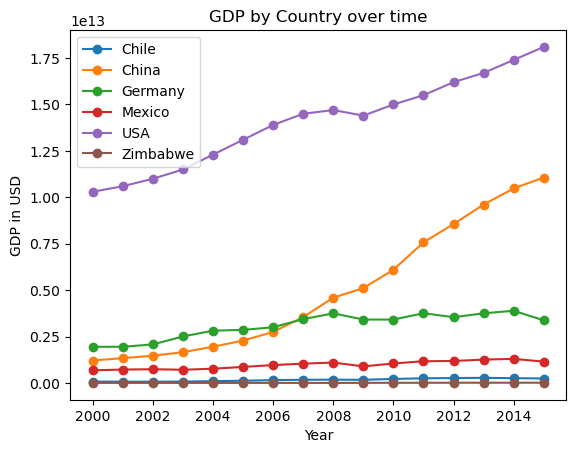

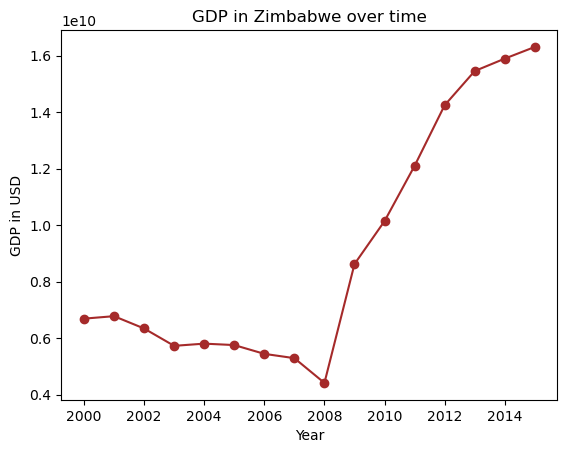

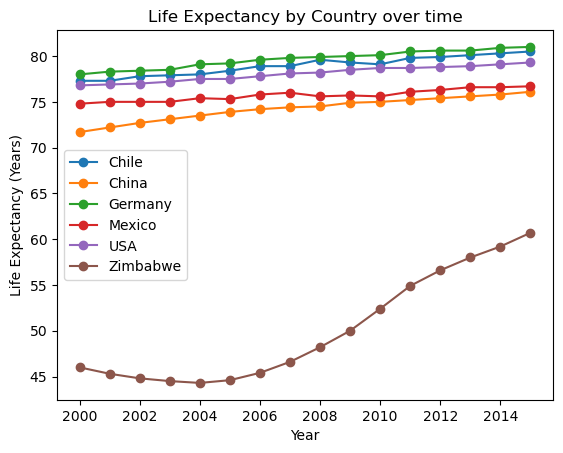

<Figure size 640x480 with 0 Axes>

In [2]:
countries = all_data.Country.unique()
country_labels = [cty if cty != 'United States of America' else 'USA' for cty in countries]

def show_gdp_expectancy(data):
    plt.title("GDP by Country over time")
    plt.xlabel("Year")
    plt.ylabel("GDP in USD")
    for country in countries:
        country_data = data[data.Country == country]
        plt.plot(country_data.Year, country_data.GDP, marker='o')
    plt.legend(country_labels, loc='best')
    plt.show()
    plt.clf()
    
    zimbabwe_data = data[data.Country == 'Zimbabwe']
    plt.plot(zimbabwe_data.Year, zimbabwe_data.GDP, marker='o', color='brown')
    plt.title("GDP in Zimbabwe over time")
    plt.xlabel("Year")
    plt.ylabel("GDP in USD")
    plt.show()
    plt.clf()
        
    plt.title("Life Expectancy by Country over time")
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy (Years)")
    for country in countries:
        country_data = data[data.Country == country]
        plt.plot(country_data.Year, country_data.Expectancy, marker='o')
    plt.legend(country_labels, loc='best')
    plt.show()
    plt.clf()
    

show_gdp_expectancy(all_data)


### Taking GDP as an indicator of economic progress, how does life expectancy track against it?

Let's find out!


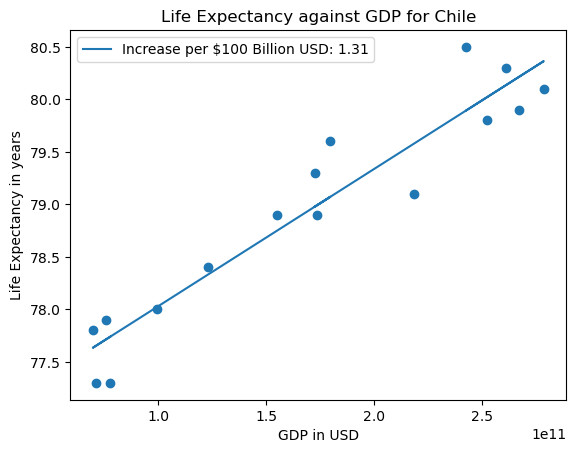

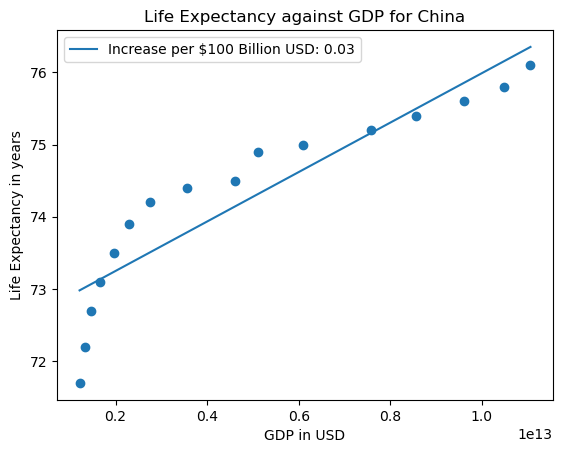

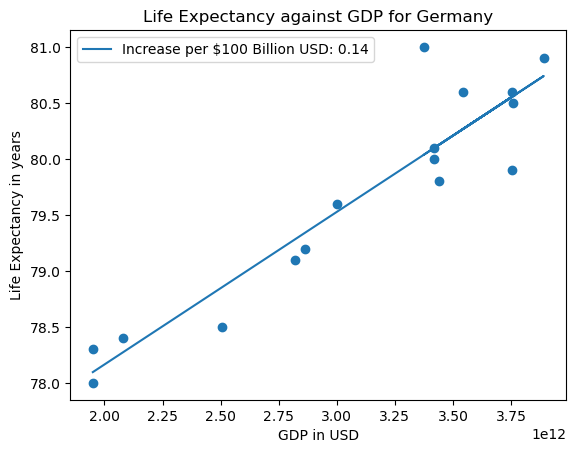

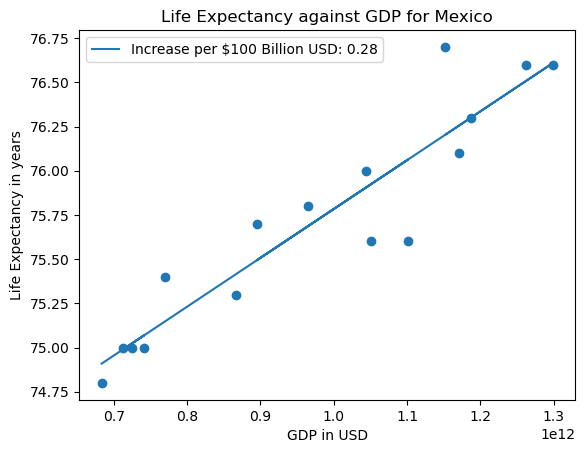

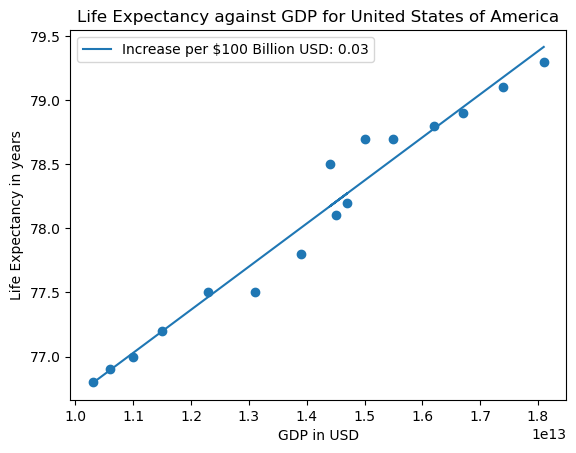

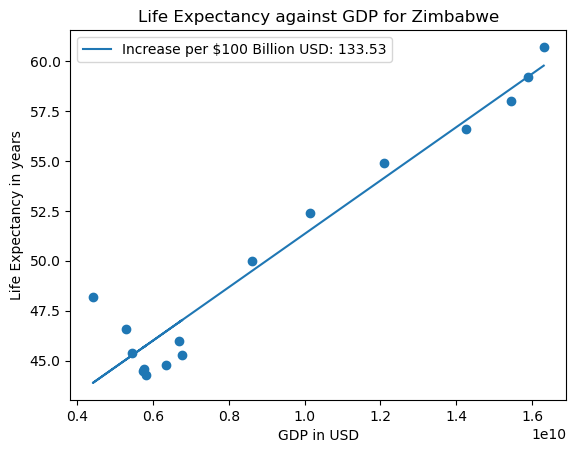

<Figure size 640x480 with 0 Axes>

In [3]:
all_data.head()
for country in countries:
    cty_data = all_data[all_data.Country==country]
    plt.scatter(cty_data.GDP, cty_data.Expectancy)
    plt.title('Life Expectancy against GDP for {}'.format(country))
    plt.xlabel('GDP in USD')
    plt.ylabel('Life Expectancy in years')
    
    # Generate best fit line
    model = sm.OLS.from_formula('Expectancy ~ GDP', data = cty_data)
    results = model.fit()
    fitted_values = results.predict(cty_data.GDP)
    slope = results.params[1]
    plt.plot(cty_data.GDP, fitted_values, label='Increase per $100 Billion USD: {}'.format(round(slope*1e11,2)))
    plt.legend()
    
    plt.show()
    plt.clf()

# Evaluation
## Life expectancy continues to climb, with Zimbabwe lagging behind
* For all countries inspected, life expectancy has risen from 2004 onward
* Zimbabwe has the lowest life expectancy of countries in the study by at least a decade
    * Between 2000 and 2004, life expectancy in Zimbambwe actually dropped.  This may have been caused by conflicts, sanctions or food crises and also reflects in higher values for other countries that may not have been subjected to these conditions.
    
## Some countries see a dip in GDP 
* Germany, Mexico, Chile and have seen declines immediately prior to 2015
    * Investigate the cause of these declines and research what measures can be put in place to reverse these declines
* Zimbabwe's GDP more than tripled from ~$4.4B to ~16.3B between 2008 and 2015.  Like the improvement in life expectancy, this may also reflect a relatively peaceful period
    * Zimbabwe's GDP is dwarfed by others, but a more realistic indicator against other countries is GDP per capita, which we don't have the data for
    
## There is a strong correlation between economic progress and life span
* The steeper rate of increase for Zimbabwe points out the outsized influence of GDP as a factor in life expectancy for developing countries, and the importance of paying attention to building the economy in that country
* The lower incline in other countries indicates that after a certain point, other factors (such as education, infrastructure, health services, etc.) have more of an influence on average life expectancy and should be studied in more detail

# Disclaimer
While these selected countries may be fairly representative of the regions they are located in, the reader should not necessarily assume that the same conclusions apply to other countries.